### Name: James Bird
### Username: JXB1330
### ID number: 2212304
**please edit the above with your details to personlise this notebook**

# Lab 3b: Machine Learning: Digit Recognition

# Introduction

In this lab you will implement a simple pattern recognition system which determines numbers from hand-written digits.

To achieve this you will have to learn about the k-nearest neighbors (k-NN) algorithm, and will implement this algorithm from scratch.

You will apply your algorithm on a famous pre-processed dataset of digits, called the MNIST dataset. You can find this example in many places on the web e.g. here with k=7 : https://www.youtube.com/watch?v=ZD_tfNpKzHY

You finish the lab by draw your own digits to see if your code can recognise them!

# Learning Outcomes

In the previous labs you have learned Python and basic data handling / pre-processing. Now you are going to process data using algorithms.

By the end of this lab you will have:

> Learned about disciminative techniques for pattern recognition - specifically k Nearest Neighbour.

> Implemented the KNN algorithm in Python.


**tasks you are required to do are highlighted in bold throughout this notebook**

## Tools to complete this lab

* Use this Jupyter notebook and complete/save your work in it. This requires a computing platform capable of running Python 3.x and Jupyter notebook (preferred). NOTE: pressing CTRL+Z on a highlighted cell will return it to itsprevious state. Use this to undo any changes you have made if you get lost and want to start again.

* If for whatever reason you do not or cannot use Jupyter notebooks, then use the PDF document of this as a 'lab sheet' and type / copy the python code into a py file in the order presented in the sheet, using the IDLE python editor and suitable comments between sections e.g. #Exercise 1. This will require a computing platform with Python 3.x installed. (not recommended)

# What is machine learning / digit recognition?

Say we look at an image and give it a label e.g. a digit image showing "0" could be given the label "0".
We want a computer (machine) to do this.

How?

We teach it to guess which labels correspond to what digits. 
This is called "machine learning", and the computer does this by recognising patterns in repeated examples of the digits (data) - this is called pattern recognition.

The process of learning a pattern for each label is called training. The labels are called classes. Because the machine is trained using data with labels, we call it supervised learning. 

The guessing is called inference, or more specifically for labelling, classification.

Of course, the machine could infer incorrectly e.g. a digit 0 might be incorrectly classed as an 8, if we haven't trained it with enough data to dinstinguish between patterns ...

To build such a system, we need some training data (exercise 1) and a technique to learn patterns and infer classes (exercise 2 onwards...), 

# Exercise 1: Training Data - MNIST

The MNIST dataset is a dataset of handwritten digits. The original images started as 32x32 bitmaps and were then processed until they were reduced to an 8x8 matrix of integers in the range 0 to 16. 

The scikit-learn module in Python is a machine learning module in which there are a few datasets to play around with, including the MNIST dataset. The code below imports the MNIST dataset.  

**Run the code below to load the dataset and print a short description of it**

In [ ]:
from sklearn import datasets

mnist = datasets.load_digits()

print(mnist.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

The ```load_digits()``` method returns a dictionary-like object with the matrices corresponding to each digit and the label of each digit. It is described on the website as:  

> Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘images’, the images corresponding to each sample, ‘target’, the classification labels for each sample, ‘target_names’, the meaning of the labels, and ‘DESCR’, the full description of the dataset.

**Run the code below to get the image data and labels of a random image, the ```images``` and ```target``` from the ```mnist``` object**

In [4]:
import random

images = mnist.images
labels = mnist.target
i = random.randint(0,len(images))
print(images[i])
print(labels[i])

[[ 0.  0.  2. 11. 13.  4.  0.  0.]
 [ 0.  0. 12. 16. 13. 15.  0.  0.]
 [ 0.  0. 16.  9.  1.  3.  0.  0.]
 [ 0.  4. 16.  6. 14.  9.  1.  0.]
 [ 0.  7. 16. 16. 16. 16.  6.  0.]
 [ 0.  1. 16. 14.  4. 16.  8.  0.]
 [ 0.  0. 12. 16. 13. 16.  2.  0.]
 [ 0.  0.  2. 10. 16.  7.  0.  0.]]
6


**Run the cell below multiple times to visualise the digits**

<IPython.core.display.Javascript object>


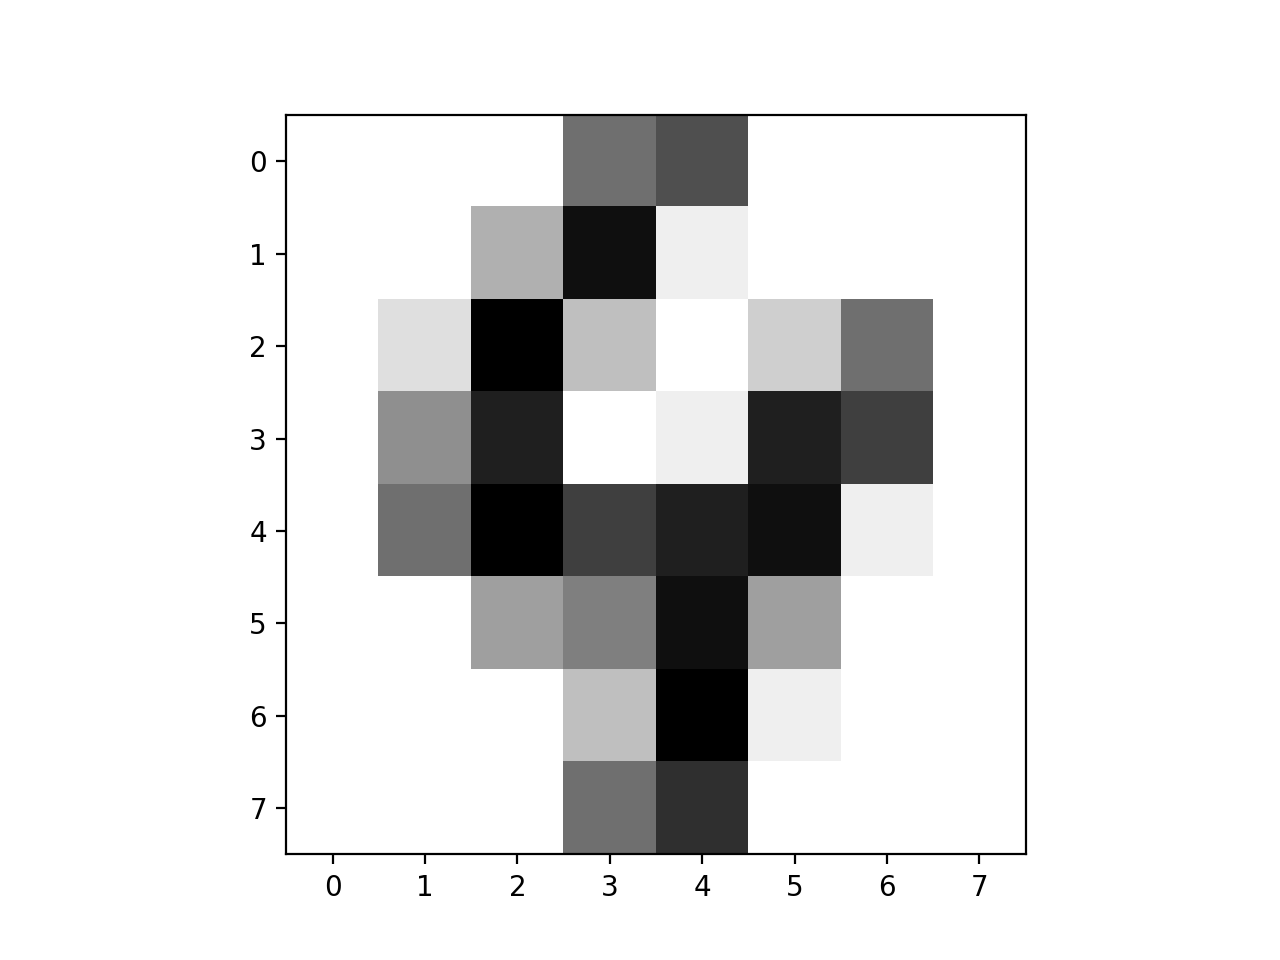

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import random 
image = images[random.randint(0,len(images))]
plt.imshow(image,cmap=plt.cm.gray_r)

The element in ```images``` is a 2D matrix which is the handwritten digit, and the element in ```labels``` is the label corresponding to that image. 

Things would be a lot easier if, instead of having to reference ```images``` and ```labels``` separately, we could have a list of tuples in which the first element is the digit matrix and the second element is the digit label. 


**Create a variable ```images_and_labels``` below which is the list of tuples. this can be done using the list and zip functions together.**

In [8]:
# Your code here

images_and_labels = (list(zip(images,labels)))
print(images_and_labels)
#?zip
#?list

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0), (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1), (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
    

# Exercise 2: Pattern Recognition Classification: K-Nearest Neighbours Algorithm

The k-Nearest Neighbors algorithm (kNN) is a very simple algorithm used for pattern recognition.

In our example, the algorithm stores all of the digit images for training, and their classes.

Then to infer the class of a test digit image, it searches for the k nearest digits in its training data, retrieves their corresponding classes, and assigns the new digit image to the most likely class.

for the digit recognition, we have 10 classes, with an 8*8 image having 64 dimensions i.e. numbers describing it.

The simplest problems may have only 2 classes and fewer dimensions. An example is given below of a 2-class problem with 2 dimension data.

**excute the code below to generate the graph plotting data samples along the x/y axes and their labels in colour **

<IPython.core.display.Javascript object>


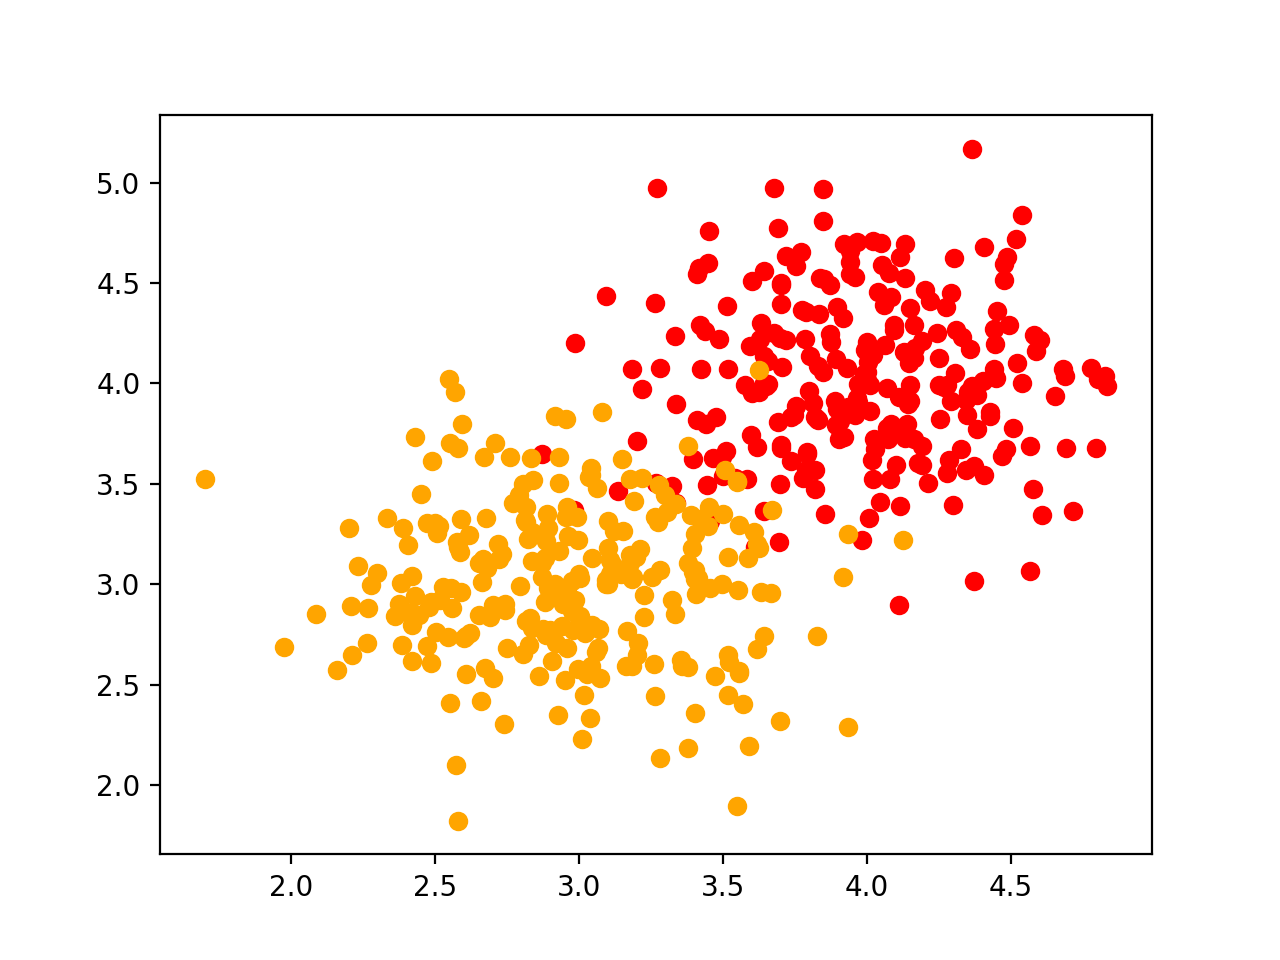

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

centers = [[3,3],[4,4]]
X, labels_true = make_blobs(n_samples = 500, centers = centers, cluster_std = 0.4)

r = []
b = []
for i in range(500):
    if labels_true[i] == 1:
        r.append(X[i])
    else:
        b.append(X[i])
r = np.asarray(r)
b = np.asarray(b)

plt.scatter(r.T[0],r.T[1],color='red')
plt.scatter(b.T[0],b.T[1],color='orange')

This would be our kNN algorithm storing all of our training data.

Now you have a new data sample you want to classify as either red or organge.

**run the code below and observe your new data as a green dot**

<IPython.core.display.Javascript object>


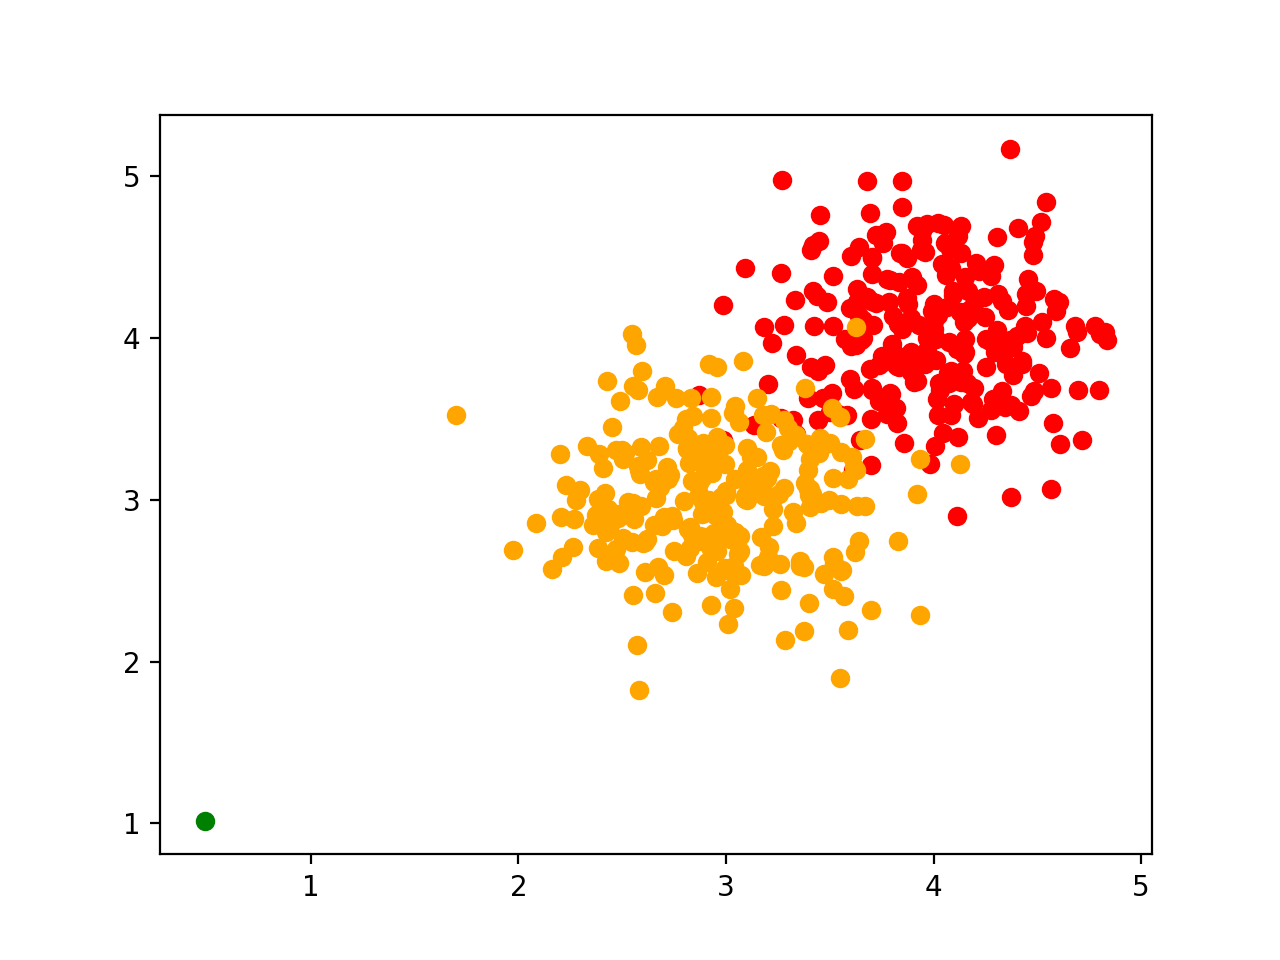

In [10]:
%matplotlib notebook
plt.scatter(r.T[0],r.T[1],color='red')
plt.scatter(b.T[0],b.T[1],color='orange')
datapoint = [random.uniform(0,5),random.uniform(0,5)]
plt.scatter(*datapoint,color='green')

The k-NN algorithm looks at the k closest neighbours to the datapoint we want to classify. 

The algorithm decides that the given datapoint will have the label that is most common among it's k-closest datapoints. 

**Looking at the green point in the above graph. How many neighbours (the value of k) do you think would  the best?**

The value for k that you choose will change the accuracy. 

For k=1, the algorithm looks only at the closest neighbour. This is the very simplest version of k-NN, but may not the best value of k to use for every classification scenario, since real data rarely has clear boundaries between classes.

Setting the value of k so that all points are considered is not a good idea either - the class asigned will simply be the class with the most points. This may also be too slow to compute.

Setting the value of k to an even number is not recommended to avoid a tiebreak situation ...

thus, typically, the value of k chosen is an odd number.

# Exercise 3: Distance Measures: the Euclidean Distance and Distance Array

When you looked at the graph above you probably decided the closest points to the green line were those with the shortest distance i.e. straight lines.

This is known as the euclidean distance.

The euclidean distance between 2 points in a 2D or 3D dataset can be imagined as the length of the line which connects two points. This intuition holds for higher dimensions, although we find it more difficult to visualise.

In 2 dimensions, the euclidean distance between 2 points $a = (a_1,a_2)$ and $b = (b_1,b_2)$ is given as

$$
d(a,b) = \sqrt{(a_1-b_1)^2 + (a_2-b_2)^2}
$$

For points in n-dimensional space, the euclidean distance between 2 points $a = (a_1,a_2,...,a_n)$ and $b = (b_1,b_2,...,b_n)$ is similarly given by

$$
d(a,b) = \sqrt{(a_1-b_1)^2 + (a_2-b_2)^2 + ... + (a_n-b_n)^2}
$$

Euclidean distance is a specific instance of the more generalised Minkowski distance, where we use squares/square root. You may use other powers when measuring distance e.g. 1 is known as the Manhattan distance, referencing the grid street layout in New York city. 

Our digit data is 2 dimensions and euclidean distance is fine. However, in higher dimension data, our intuition of distance breaks down and other distance measures may work better.

**Create a function which has two images as arguments. It should return the euclidean distance between the images to measure the similarity. The distance should be measured between each corresponding pixel in the image and summed for all pixels.You should do this with list comprehensions, and the zip, sum, and list functions.**

In [11]:
# Your code here
def euclidean(a,b):
    #calculate euclidean distance for each pixel pair o
    #you should be able to do this with sum, zip, pow and a list comprehension
    return sum(sum([(a - b)**2 for a, b in zip(a,b)]))**0.5

In [14]:
# Try your algorithm on the MNIST digits to measure the similarity between two random digits
import random
i= random.randint(0,len(images)) #image 1 index
j= random.randint(0,len(images)) #image 2 index
print(euclidean(images[i],images[j]))



49.49747468305833


In [15]:
#you can use the test code below to test your code  - do not conintue until your code passes
import numpy as np; import random as r; import unittest as u
i = r.randint(0,len(images)); j = r.randint(0,len(images))
class MyTest(u.TestCase):
    def test(self):self.assertEqual(euclidean(images[i],images[j]),np.linalg.norm(images[i] - images[j])) 
res = u.main(argv=[''], verbosity=3, exit=False); assert len(res.result.failures) == 0

test (__main__.MyTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


Recall, to find what class our digit belongs to, we need to find the closest digits in our training set to it, e.g. we would expect, if our digit was the number 2, to be closer to all our training digits which are also the number 2.

You have written a function to do this distance calculation between your digit and a single digit in the training data. 

To find the closest digits, you now need to calculate the distances between your digit and every digit in the training data

As well as the distance, you also need to know the label of the digit.

**write a function which returns an list of tuples. Each tuple represents a digit in your training data. The first element of the tuple should be the distance, the second element should be label of the digit you are measuring the distance to. the final list should be sorted in ascending order of distance i.e. closest label first.**


HINTS: 

It is not necessary in this sequence to store the actual digit image once the euclidean distance has been calculated, since the distance calculation (and label) is all we need for out kNN algorithm.

You should be able to do this using 3 list comprehensions.

Have a look into the built-in function ```sorted()``` for sorting your list once computed.

Our image data is 2 dimensions i.e. greyscale rows and columns, so you should start with this. 

Ideally, your method ought to compute the distance given any dimensionality of data - not just 2 dimensions. 

The easiest way to do this in kNN is to convert your 2D data to 1D


In [16]:
# Your code here
def dist(a,b):
    ab = zip(a,b)
    abt = tuple(ab)
    dist = sum([pow(x[0]-x[1],2) for x in abt])**0.5
    return dist

def distance_array(point,data):
    p = [j for i in point for j in i]
    d =[([j for i in dp[0] for j in i],dp[1])for dp in data]
    d_array = [(dist(p,dp[0]),dp[1])for dp in d]
    sort = sorted(d_array, key=lambda array: array[0])
    return sort

#test the function:
im = images_and_labels[0][0] #just the image 
td = images_and_labels[1:10] #(you can change indices - just a sample) 
distance_array(im,td)
#print(distance_array(images_and_labels[0][0],images_and_labels))

[(40.80441152620633, 9),
 (43.9089968002003, 5),
 (44.395945760846224, 8),
 (47.57099956906519, 3),
 (48.55924216871593, 6),
 (50.33885179461288, 4),
 (54.12947441089743, 2),
 (56.0, 7),
 (59.55669567731239, 1)]

In [17]:
# Test your code here below

# Try your algorithm on the MNIST dataset as well, like this:
print(distance_array(images_and_labels[0][0],images_and_labels))

[(0.0, 0), (10.954451150103322, 0), (12.806248474865697, 0), (13.114877048604, 0), (13.2664991614216, 0), (13.341664064126334, 0), (13.45362404707371, 0), (15.427248620541512, 0), (15.652475842498529, 0), (15.874507866387544, 0), (16.3707055437449, 0), (16.522711641858304, 0), (17.029386365926403, 0), (17.349351572897472, 0), (17.378147196982766, 0), (17.4928556845359, 0), (17.549928774784245, 0), (17.832554500127006, 0), (17.944358444926362, 0), (18.0, 0), (18.05547008526779, 0), (18.05547008526779, 0), (18.083141320025124, 0), (18.138357147217054, 0), (18.439088914585774, 0), (18.466185312619388, 0), (18.520259177452136, 0), (18.57417562100671, 0), (18.601075237738275, 0), (18.788294228055936, 0), (18.841443681416774, 0), (18.894443627691185, 0), (18.947295321496416, 0), (19.026297590440446, 0), (19.131126469708992, 0), (19.157244060668017, 0), (19.4164878389476, 0), (19.4164878389476, 0), (19.493588689617926, 0), (19.72308292331602, 0), (19.77371993328519, 0), (19.77371993328519, 0)

# Exercise 4: Class implementation of kNN Algorithm

**You now need to create a function that takes this distance array and for a given value k, gets the top k elements of the array and returns the most common label out of those k elements. i.e. the kNN algorithm.**

Because your array will be sorted in terms of distance, what this method does is to get the label of the k closest points to the datapoint you are attempting to classify. This is effectively the simplest implementation of kNN.

HINT: to make this function look neat, look into using the built-in max function to help get the most common label of the k elements.

In [19]:
# Your code here
def modal_class(d_array, k):
    #get the k closest labels in the distance array and put in list
    #find the most frequetly occuring label (digit) in this list
    #return this digit value
    top = [d_array[i][1] for i in range(k)]
    print(top)
    m = max(set(top), key=top.count)
    return m
    

random digit selected at index  171  is  4


<IPython.core.display.Javascript object>


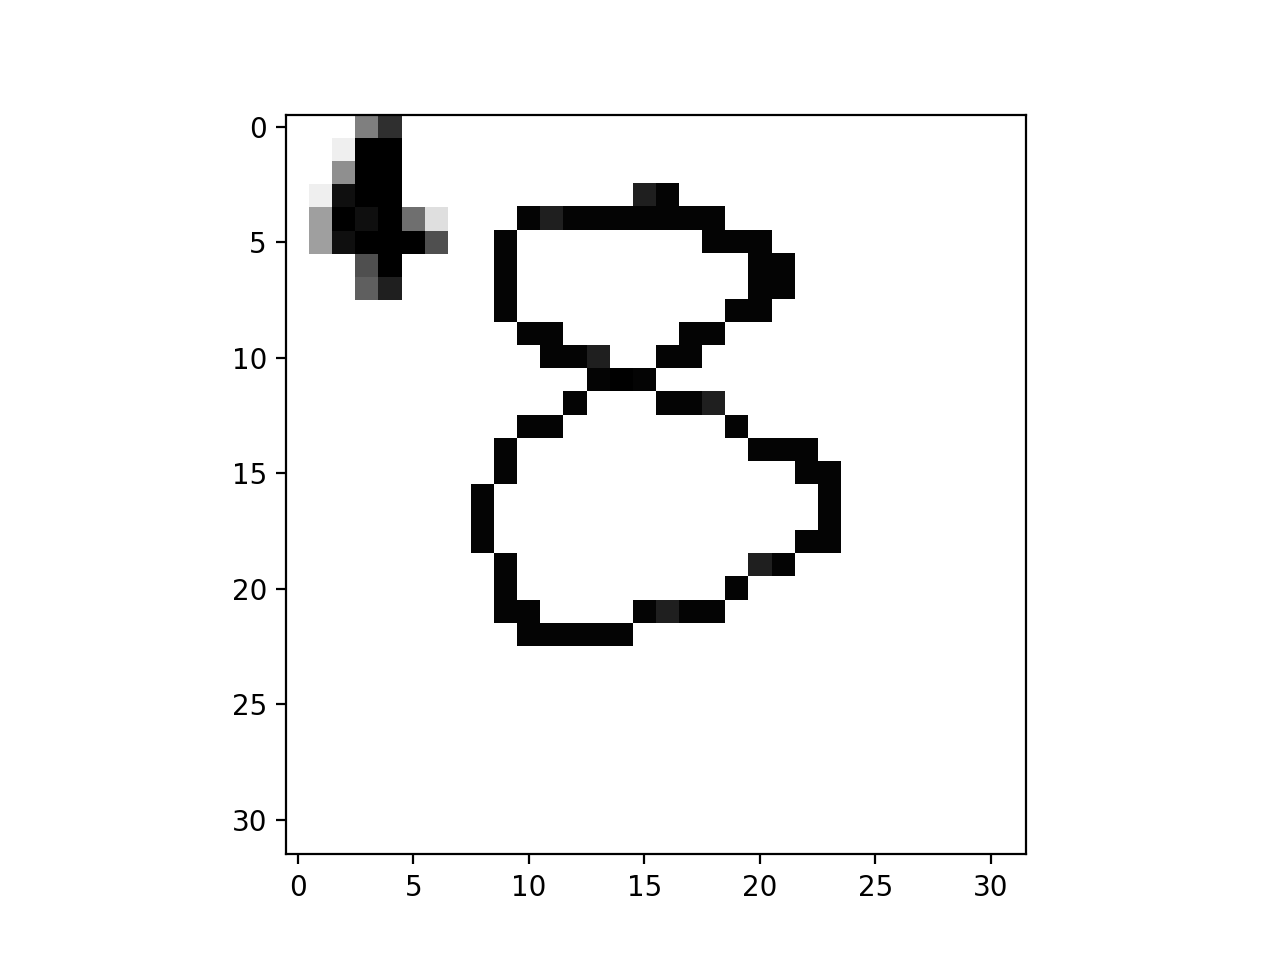

[4, 4, 4]
 Label estimate is:  4


In [ ]:
#Test your algorithm

#find random index from training data to be our digit
import random
i = random.randint(0,len(images_and_labels))
k = 3 #this is the value of k for knn - you can change this
print("random digit selected at index ",i," is ",images_and_labels[i][1])

# show the image
%matplotlib notebook
image = images_and_labels[i][0]
plt.imshow(image,cmap=plt.cm.gray_r)

#compute distance array
d_array = distance_array(images_and_labels[i][0], images_and_labels)

#estimate the label
label_estimate = modal_class(d_array, k)

print(" Label estimate is: ",label_estimate)

# Exercise 5: Validation of Algorithm - Accuracy

You now have a kNN algorithm - congratulations! b

But, how well does it perform? 

What is its accuracy i.e. how many times does it estimate the correct label/class for a digit given the neighbourhood of known labels/classes?

To do this, you split the dataset into two groups: A training set and a test set. 

We then take each point in the test set and estimate its label using our algorithm. We only use our training set for calculating our distance matrix.

Our accuracy is simply the proportion of our test set the algorithm correctly labels.


Let's break this down to simpler steps.

The first step: split the original dataset into test and train. 

For kNN, you may want the training set to be as large as possible to get the best accuracy but have enough test points for the accuracy estimation to be reliable.

This is a trade-off.

**Create a function that takes a percentage split (i.e. a number between 0 and 1) to split the images_and_labels dataset, returning two datasets - the training set and the test set.**

In [22]:
# Your code here
def dataset_split(percentage, dataset):
    #split here
    dataset,training_data, test_data = np.split(dataset,[int(len(dataset)*percentage), int(len(dataset)*1-percentage)])
    return training_data, test_data
    
    

In [34]:
# Test your code here below
dataset_split(0.5, images_and_labels)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


(array([[array([[ 0.,  0.,  1., 11., 14., 15.,  3.,  0.],
                [ 0.,  1., 13., 16., 12., 16.,  8.,  0.],
                [ 0.,  8., 16.,  4.,  6., 16.,  5.,  0.],
                [ 0.,  5., 15., 11., 13., 14.,  0.,  0.],
                [ 0.,  0.,  2., 12., 16., 13.,  0.,  0.],
                [ 0.,  0.,  0., 13., 16., 16.,  6.,  0.],
                [ 0.,  0.,  0., 16., 16., 16.,  7.,  0.],
                [ 0.,  0.,  0., 11., 13., 12.,  1.,  0.]]), 8],
        [array([[ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.],
                [ 0.,  2., 16., 16., 16.,  7.,  0.,  0.],
                [ 0.,  2., 15., 16., 15.,  2.,  0.,  0.],
                [ 0.,  0.,  6., 16., 15.,  7.,  0.,  0.],
                [ 0.,  0., 14., 10.,  6., 16.,  3.,  0.],
                [ 0.,  1., 16.,  3.,  0., 16.,  7.,  0.],
                [ 0.,  0., 10., 11., 11., 15.,  3.,  0.],
                [ 0.,  0.,  3., 14., 16.,  6.,  0.,  0.]]), 8],
        [array([[ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.],
  

The second step:

**create a function that takes the percentage and a value for k and the original dataset, splits the dataset (by calling the above function), and estimates each test points accuracy against its ground truth. The function should return/print the accuracy and how long it takes for the function to perform its task. **

HINT:
To time how long a function takkes to run, you can use the ```datetime``` module.

In [ ]:
# Your code here
import datetime

def tester(percentage, k, dataset):
    #split the dataset into test/train using step 1
    training_data, test_data = dataset_split(percentage, dataset)
    size = len(test_data)
    count = 0
    start = datetime.datetime.now() #start time
    for point in test_data:
        d_array = distance_array(point[0],training_data)
        c = modal_class(d_array,k)
        if point[1] == c:
            count += 1
    
    end = datetime.datetime.now() #end time
    accuracy = (count/size) * 100
    print("Accuracy: {} \nTime: {}".format(accuracy, end-start))

In [24]:
# Test your code here - this will take a long time?
k = 3 #experiment with different values of k in kNN
p = 0.3  #experiment with different values for percentages
tester(0.3, k, images_and_labels)

[8, 8, 8]
Accuracy: 100.0 
Time: 0:00:00.059559


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


**compare you algorithms performance with your lab partners**
**experiement with different values of k and train/test set split to get the highest accuracy**

best value for k and p for maximum accuracy = 


# Exercise 6: Creating and test your own digits - Data preprocessing.

Now for some fun! 

In the real applications, you cannot measure accuracy automatically, if you did you would not need a pattern recognition system in the first place!

Therefore, you can now test your kNN on some of your own handwritten digits.

**To draw digits yourself, open the Paint application, set the canvas size to 32x32, select the black pen tool and draw your digit on the canvas using the mouse. Save the images in BMP format and make sure to save the images either where your notebook is saved or in a location to which you can easily direct your methods to fetch the images.**  

The images you create must be converted to match the same format as the MNIST digits used in this lab.

The images are black and white and in BMP format. This means that the values of the pixels will be either 255 (i.e. the pixel is white) or 0 (i.e. the pixel is black and is part of the actual digit).  

The MNIST description method states the following:

> 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is an integer in the range
0..16.

**Create a function that takes the path or location of your image and processes it to make it into an 8x8 matrix like the MNIST dataset. You can use the the ```imread``` method in the ```scipy.misc``` module to get the pixel values of an image.**

In [36]:
# Use this cell to play around with the scipy.misc.imread method
import os
from scipy import misc
from PIL import Image
import matplotlib.pyplot as plt
image = plt.imread('drawing.bmp')
print(image)
plt.imshow(image,cmap=plt.cm.gray_r)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


In [37]:
# Your code here
import scipy
from matplotlib.pyplot import imread
def process(image_path):
    image = imread(image_path)
    processed_image = [[]]


**Use the code below to predict the label for your image**

In [40]:
def predict(image,k,dataset):
    d_array = distance_array(image,dataset)
    c = modal_class(d_array,k)
    print("Prediction: {}".format(c))

In [41]:
# call the above functions using the MNIST dataset
pimage = process("drawing.bmp")
predict(pimage,10,images_and_labels)

TypeError: 'NoneType' object is not iterable

# End of Lab

congraultations - you have demonstrated competence in processing data in interactive computing applications using Python. 

Jupyter notebooks are not just for coding; you can write in them too in markup language. So note in the next cell what what you learned/found difficult or easy in the space below.

**please reflect on your learning below**

### I rate this lab (out of 5): 5

### What I find easy:


### What I find difficult:


### What I should improve:


# Next Learning Steps

* **Upload this completed ipynb notebook to canvas**
* **congratulatons - you have finished the 2021 labs :-)**

# Python for Engineers
(c) 2018-2021 Dr Neil Cooke, School of Engineering, Collaborative Teaching Laboratory, University of Birmingham